# Machine Learning Task


Can we apply machine learning to this dataset? If yes, then show us how, apply at least two different machine learning algorithms, and compare their results?

## Answere is Yes: 
Yes we can apply Machine Learing on this dataset, since it's classification problem we will apply two different classification algorithsm. the dataset is divided into two parts. the first sheet dataset which is biopsy before surgery and the second part is which has volume and age is after the surgery for the detection of prostate cancer. 

In the biospy sheet we will consider Gleason_SB_TB as input and PIRADS as output.based on the gleason combine socre we will train our ML model to predict PIRADS grading system.

I am going to use 2 different algorithm on each dataset:


* Support Vector Machine (SVC)
* Naive Bayes Classification


Let's take a look at these steps

# Steps
1. Importing Libraries and Data
2. Having Idea About Data
1. Data Prepartion for Machine Learning
1. Confusion Matrix Function
1. Machine Learning Algorithms
    * SVM Classification
    * Naive Bayes Classification
1. Result



## Step 1: Import Useful Libraries and Data

In [109]:
# For data analysis, we import pandas library
import pandas as pd

# For numerical computation, we will use numpy library
import numpy as np

# For data visualization, we will use matplotlib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning and data prepartion we will use the following library.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB


In [110]:
#load data from excel file, since we have two sheets we will load them separately
baseline = pd.read_excel("MRI_Biopsy_Data.xls", sheet_name="Baseline")
biopsy = pd.read_excel("MRI_Biopsy_Data.xls", sheet_name="Biopsy")


## Step 2: Having Idea About Data

In [111]:
# check 5 random sample values from  Baseline Sheet
baseline.sample(5)

,Age,PSA,Volume,PSAD,PIRADS,ISUP
729,59,5.04,30.7,0.164169,5,4
226,74,3.70,21.1,0.175355,4,0
172,67,15.00,24.0,0.625000,3,0
587,55,15.30,64.0,0.239063,4,5
57,61,7.69,51.0,0.150784,3,0


In [112]:
# check 5 random sample values from  Biopsy Sheet
biopsy.sample(5)

,PIRADS,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation*,IL_Diameter*
432,3,6.0,0.0,6.0,3.0,2,13.0
95,3,0.0,0.0,0.0,1.0,1,13.0
313,4,0.0,0.0,0.0,2.0,2,12.0
41,3,0.0,0.0,0.0,1.0,2,16.0
389,5,7.0,7.0,0.0,1.0,3,18.0


## Step 3: Data Prepartion for Machine Learning

In this section I am going to split data into two pieces. Train and test. In order to do this I am going to use SKLearn library's Train Test Split Function.

In [113]:
#Before surgery data split
biopsy_input = np.array(biopsy['Gleason_SB_TB'])
biopsy_output = np.array(biopsy["PIRADS"])



#After Sugery datasplit
baseline_output = np.array(baseline["PIRADS"])
baseline_input = baseline.copy()
baseline_input.drop(['PIRADS', 'ISUP'], axis = 1, inplace = True)
baseline_input=np.array(baseline_input)
baseline_input=np.where(np.isnan(baseline_input), 0, baseline_input)
baseline_output=np.where(np.isnan(baseline_output), 0, baseline_output)


In [114]:
#Before surgery Test train split
x_train_biopsy,x_test_biopsy,y_train_biopsy,y_test_biopsy = train_test_split(biopsy_input,biopsy_output,random_state=1,test_size=0.3)

#after surgery Test train split
x_train_baseline,x_test_baseline,y_train_baseline,y_test_baseline = train_test_split(baseline_input,baseline_output,random_state=1,test_size=0.3)

## Step 4: Confusion Matrix Function

In this section I am going to define a function that creates a seaborn heatmap from a confusion matrix.

In [115]:
def plot_confusionMatrix(y_true,y_pred):
    cn = confusion_matrix(y_true=y_true,y_pred=y_pred)
    
    fig,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cn,annot=True,linewidths=1.5)
    plt.show()
    return cn

In [116]:
score_list_biopsy = {} # I've created this dict for saving score variables into it of both experiments 
score_list_baseline = {} # I've created this dict for saving score variables into it of both experiments

## Step 5: Machine Learning Algorithms

### Support Vector Machine Classification
In this section I am going to use SVM classification on both dataset before and after surgery for prostate detection.

#### SVM on Before surgery dataset

In [117]:
svc = SVC()
svc.fit(x_train_biopsy.reshape(-1, 1),y_train_biopsy.reshape(-1, 1))
svc_score = svc.score(x_test_biopsy.reshape(-1, 1),y_test_biopsy.reshape(-1, 1))
score_list_biopsy["SVC"] = svc_score
print(f"Score is {svc_score}")

Score is 0.4872881355932203


D:\Interviews Stuff\University of Galway\Dataset\packages\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Our first algorithm's score is 48%. I think it is low, we  need further Literature

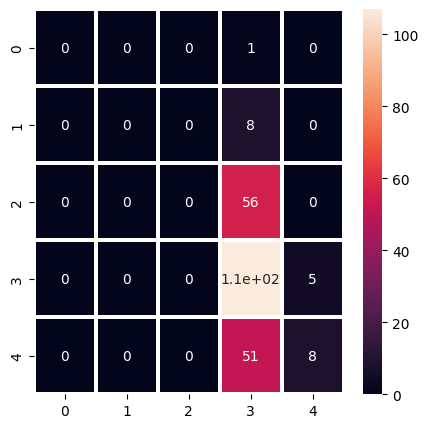

array([[  0,   0,   0,   1,   0],
       [  0,   0,   0,   8,   0],
       [  0,   0,   0,  56,   0],
       [  0,   0,   0, 107,   5],
       [  0,   0,   0,  51,   8]], dtype=int64)

In [118]:
y_pred_biopsy = svc.predict(x_test_biopsy.reshape(-1, 1))
plot_confusionMatrix(y_test_biopsy,y_pred_biopsy)

#### SVM on After surgery dataset

In [119]:
svc = SVC()
svc.fit(x_train_baseline,y_train_baseline)
svc_score = svc.score(x_test_baseline,y_test_baseline)
score_list_baseline["SVC"] = svc_score
print(f"Score is {svc_score}")

Score is 0.4830508474576271


Our first algorithm's score is 48%. I think it is low, we  need further Literature

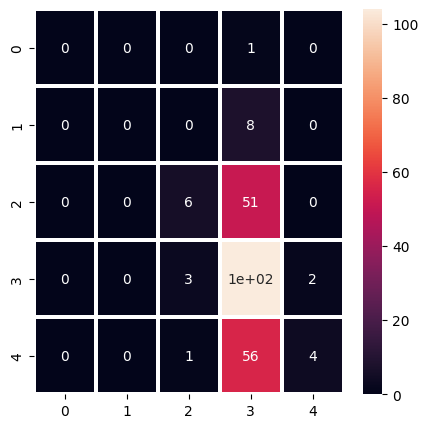

array([[  0,   0,   0,   1,   0],
       [  0,   0,   0,   8,   0],
       [  0,   0,   6,  51,   0],
       [  0,   0,   3, 104,   2],
       [  0,   0,   1,  56,   4]], dtype=int64)

In [120]:
y_pred_baseline = svc.predict(x_test_baseline)
plot_confusionMatrix(y_test_baseline,y_pred_baseline)

### Naive Bayes Classification
In this section I am going to use Naive Bayes Classification on both dataset before and after surgery for prostate detection.

#### Naive Bayes Before surgery dataset

In [121]:
nbc = GaussianNB()
nbc.fit(x_train_biopsy.reshape(-1, 1),y_train_biopsy.reshape(-1, 1))
nbc_score = nbc.score(x_test_biopsy.reshape(-1, 1),y_test_biopsy.reshape(-1, 1))
score_list_biopsy["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.3347457627118644


D:\Interviews Stuff\University of Galway\Dataset\packages\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Our score is 33% which is lower then SVM

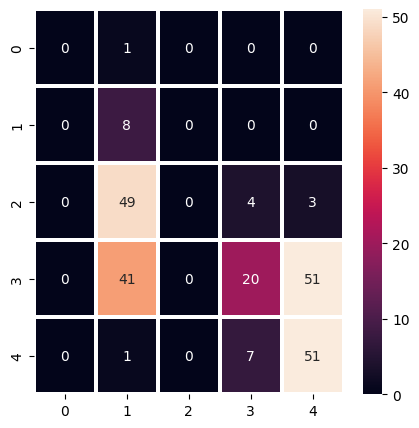

array([[ 0,  1,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0, 49,  0,  4,  3],
       [ 0, 41,  0, 20, 51],
       [ 0,  1,  0,  7, 51]], dtype=int64)

In [122]:

y_pred_biopsy = nbc.predict(x_test_biopsy.reshape(-1, 1))
plot_confusionMatrix(y_test_biopsy,y_pred_biopsy)

#### Naive Bayes After surgery dataset

In [123]:
nbc = GaussianNB()
nbc.fit(x_train_baseline,y_train_baseline)
nbc_score = nbc.score(x_test_baseline,y_test_baseline)
score_list_baseline["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.4449152542372881


* Our score is 44% which is lower then SVM

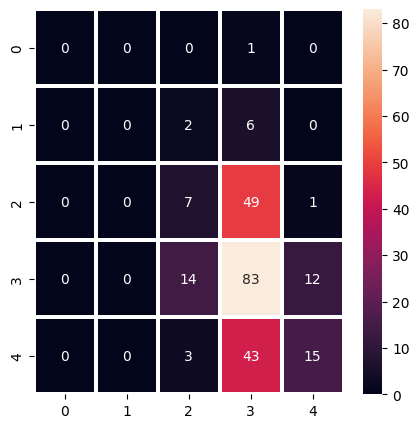

array([[ 0,  0,  0,  1,  0],
       [ 0,  0,  2,  6,  0],
       [ 0,  0,  7, 49,  1],
       [ 0,  0, 14, 83, 12],
       [ 0,  0,  3, 43, 15]], dtype=int64)

In [124]:

y_pred_baseline = nbc.predict(x_test_baseline)
plot_confusionMatrix(y_test_baseline,y_pred_baseline)

## Step 6: Result

In [127]:
#Results of SVM and NaiveBayes before Surgery
print(score_list_biopsy)

#Results of SVM and NaiveBayes after Surgery
print(score_list_baseline)

{'SVC': 0.4872881355932203, 'GaussianNBC': 0.3347457627118644}
{'SVC': 0.4830508474576271, 'GaussianNBC': 0.4449152542372881}
